In [ ]:
from datascience import *
%matplotlib inline
path_data = '../../../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Understanding the function sample_proportions()

In [ ]:
eligible_population = [0.1, 0.3, .6]
sample_proportions(3, eligible_population)

# Example 1

In [123]:
#Use sample_proportions to simmulate jury selection if we assume selection were random from
#a population of 26% Black and 74% not Black
eligible_population = [0.26, 0.74]
sample_proportions(100, eligible_population)#why 100 here for this example??

array([0.28, 0.72])

In [124]:
# count of black men in a simulated panel

(100 * sample_proportions(100, eligible_population)).item(0)#why diff between cells 19 and 20?

28.000000000000004

In [125]:
#run a simulation of 10000 possible jurie pools
counts = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    simulated_count = (100 * sample_proportions(100, eligible_population)).item(0)
    counts = np.append(counts, simulated_count)

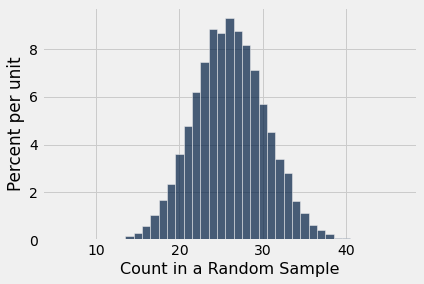

In [126]:
#make a histogram to visualize the results
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))

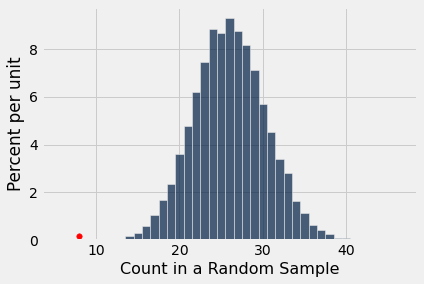

In [127]:
#compare with what we observed (8 Black men)
Table().with_column(
    'Count in a Random Sample', counts
).hist(bins = np.arange(5.5, 46.6, 1))
plots.scatter(8, .002, color='red', s=30);

In [ ]:
#What do you conclude?

# Example 2

Mendel's model predicts 75% Purple and 25% white plants.

Mendel collects data by growing 929 plants.

Mendel finds 705 out of 929 to be purple ().

*We need to asses this evidence.  To what degree does it support or refute the model?*

    1. Mendel has calculated a statistic (~.7589) or |.7589 - .75|
        lets use the statistic expressed as an absolute distance
        This is the standard way to compare whether two numbers are different
    2. We need to simulate this statistic to understand how this statistic would behave
        if the model were true.
    3. We compare Mendels's statistic to the simulation to understand the degree to which it
        could have come from the model Mendel proposes.

In [128]:
#Simulate one statistic
model_proportions = [0.75, 0.25]
abs(100 * sample_proportions(989, model_proportions).item(0) - 75)#the difference between the simulated % of purple plants and 75%

0.32861476238625187

In [129]:
#Simulate many statistics
distances = make_array()

repetitions = 10000
for i in np.arange(repetitions):
    one_distance = abs(100 * sample_proportions(929, model_proportions).item(0) - 75)
    distances = np.append(distances, one_distance)

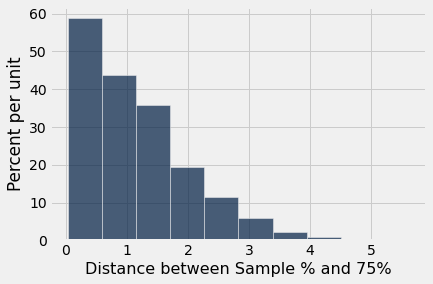

In [130]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()

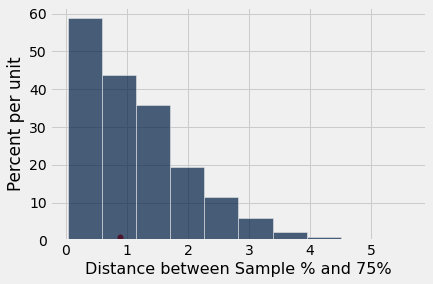

In [131]:
#Compare observed statistic to simulated statistics
observed_statistic = abs (100 * (705 / 929) - 75)
observed_statistic

Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.scatter(observed_statistic, .008, color='red', s=30);

In [ ]:
observed_statistic

In [ ]:
# Example 3 Multiple categories

In [ ]:
jury = Table().with_columns(
    'Ethnicity', make_array('Asian', 'Black', 'Latino', 'White', 'Other'),
    'Eligible', make_array(0.15, 0.18, 0.12, 0.54, 0.01),
    'Panels', make_array(0.26, 0.08, 0.08, 0.54, 0.04)
)

jury

In [ ]:
jury.barh('Ethnicity')#which ethnicities are over/under represented?

In [ ]:
#what would a random sample look like?
eligible_population = jury.column('Eligible')
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury.with_column('Random Sample', sample_distribution)
panels_and_sample

In [ ]:
panels_and_sample.barh('Ethnicity')

Instead of comparing two numbers like we did before we need to compare two distributions!  

We need a new static to summarize the difference between distributions

In [ ]:
# Augment the table with a column of differences between proportions

jury_with_diffs = jury.with_column(
    'Difference', jury.column('Panels') - jury.column('Eligible')
)
jury_with_diffs

If we add up the differences they are zero! (By construction, since Eligible and Panel both sum to 1)

We can fix this by only looking at either the positive or negative difference (they will be the same), or we can look at the absolute total distance/2. All these will be the same.

In [ ]:
jury_with_diffs = jury_with_diffs.with_column(
    'Absolute Difference', np.abs(jury_with_diffs.column('Difference'))
)

jury_with_diffs

In [ ]:
jury_with_diffs.column('Absolute Difference').sum()/2

Now We need to simulate one value of the statistic

In [ ]:
def total_variation_distance(distribution_1, distribution_2):
    return sum(np.abs(distribution_1 - distribution_2)) / 2

#check to see if function works
total_variation_distance(jury.column('Panels'), jury.column('Eligible'))

In [ ]:
sample_distribution = sample_proportions(1453, eligible_population)
total_variation_distance(sample_distribution, eligible_population)


In [ ]:
# Simulate total variation distance between
# distribution of sample selected at random
# and distribution of eligible population

eligible_population = jury.column('Eligible')
panel_size = 1453

tvds = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    sample_distribution = sample_proportions(panel_size, eligible_population)
    new_tvd = total_variation_distance(sample_distribution, eligible_population)
    tvds = np.append(tvds, new_tvd)

In [ ]:
Table().with_column('TVD', tvds).hist(bins=np.arange(0, 0.2, 0.005))
plots.scatter(.14, 1.4, color='red', s=30);

In [ ]:
np.array([1,2,3])

In [ ]:
make_array([[[1,2,3], [4,5,6], [7,8,9]], [[1,2,3], [4,5,6], [7,8,9]]])

In [ ]:
np.array([[[1,2,3], [4,5,6], [7,8,9]], [[1,2,3], [4,5,6], [7,8,9]]])